## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

In [3]:
original_price=[1,5,8,9,10,17,17,20,24,30]

In [5]:
from collections import defaultdict

In [6]:
price = defaultdict(int)

In [8]:
for i,p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

In [12]:
def r(n):
    #return max([p[n],r(1)+r(n-1),r(2)+r(n-2),...,r(n-1)+r(1)])
    return max(
        [price[n]] + [r(i)+r(n-i) for i in range(1,n)]
                )

In [13]:
r(8)

22

In [24]:
solution={}

In [47]:
from functools import lru_cache

In [59]:
#脚手架程序,function可作为参数传进去
def call_time(func_1,arg):
    start = time.time()
    func_1(arg)
    print('used_time:{}'.format(time.time()-start))

In [63]:
def get_call_time(func):
    def _inner(arg):
        start = time.time()
        result = func(arg)
        print('used_time:{}'.format(time.time()-start))
        return result
    return _inner

In [61]:
call_time(func_1,10)

10
10
10
10
10
10
10
10
10
10
used_time:0.0009961128234863281


In [65]:
func_1_could_get_called_time=get_call_time(func_1)

In [66]:
func_1_could_get_called_time.__name__

'_inner'

In [67]:
func_1_could_get_called_time(10)

10
10
10
10
10
10
10
10
10
10
used_time:0.0009984970092773438


In [56]:
call_time(func_slow,10)

10
10
10
10
10
10
10
10
10
10
used_time:2.080979585647583


In [49]:
def func_1(n):
    #start = time.time()
    for i in range(n):
        print(n)
    #print('used_time:{}'.format(time.time()-start))

In [40]:
import time

In [55]:
def func_slow(n):
    #start = time.time()
    for i in range(n):
        time.sleep(0.2)
        print(n)
    #print('used_time:{}'.format(time.time()-start))

In [46]:
func_1(10)

10
10
10
10
10
10
10
10
10
10
used_time:0.001001596450805664


In [44]:
func_slow(10)

10
10
10
10
10
10
10
10
10
10
used_time:2.0128276348114014


In [26]:
@lru_cache(maxsize=2**10)
def r(n):
    max_price, split_point = max(
        [(price[n],0)] + [(r(i)+r(n-i),i) for i in range(1,n)],key=lambda x:x[0]
    )
    solution[n] = (split_point, n-split_point)
    
    return max_price

In [71]:
print(r(125))
print(solution)

373
{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (2, 2), 5: (2, 3), 6: (0, 6), 7: (1, 6), 8: (2, 6), 9: (3, 6), 10: (0, 10), 11: (1, 10), 12: (2, 10), 13: (3, 10), 14: (2, 12), 15: (2, 13), 16: (6, 10), 17: (1, 16), 18: (2, 16), 19: (3, 16), 20: (10, 10), 21: (1, 20), 22: (2, 20), 23: (3, 20), 24: (2, 22), 25: (2, 23), 26: (6, 20), 27: (1, 26), 28: (2, 26), 29: (3, 26), 30: (10, 20), 31: (1, 30), 32: (2, 30), 33: (3, 30), 34: (2, 32), 35: (2, 33), 36: (6, 30), 37: (1, 36), 38: (2, 36), 39: (3, 36), 40: (10, 30), 41: (1, 40), 42: (2, 40), 43: (3, 40), 44: (2, 42), 45: (2, 43), 46: (6, 40), 47: (1, 46), 48: (2, 46), 49: (3, 46), 50: (10, 40), 51: (1, 50), 52: (2, 50), 53: (3, 50), 54: (2, 52), 55: (2, 53), 56: (6, 50), 57: (1, 56), 58: (2, 56), 59: (3, 56), 60: (10, 50), 61: (1, 60), 62: (2, 60), 63: (3, 60), 64: (2, 62), 65: (2, 63), 66: (6, 60), 67: (1, 66), 68: (2, 66), 69: (3, 66), 70: (10, 60), 71: (1, 70), 72: (2, 70), 73: (3, 70), 74: (2, 72), 75: (2, 73), 76: (6, 70), 77: (1, 76), 78: (2

In [72]:
from functools import wraps

In [73]:
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n):
        if n in cache:result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [74]:
@memo
def r(n):
    max_price, split_point = max(
        [(price[n],0)] + [(r(i)+r(n-i),i) for i in range(1,n)],key=lambda x:x[0]
    )
    solution[n] = (split_point, n-split_point)
    
    return max_price

In [76]:
print(r(125))
print(solution)

373
{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (2, 2), 5: (2, 3), 6: (0, 6), 7: (1, 6), 8: (2, 6), 9: (3, 6), 10: (0, 10), 11: (1, 10), 12: (2, 10), 13: (3, 10), 14: (2, 12), 15: (2, 13), 16: (6, 10), 17: (1, 16), 18: (2, 16), 19: (3, 16), 20: (10, 10), 21: (1, 20), 22: (2, 20), 23: (3, 20), 24: (2, 22), 25: (2, 23), 26: (6, 20), 27: (1, 26), 28: (2, 26), 29: (3, 26), 30: (10, 20), 31: (1, 30), 32: (2, 30), 33: (3, 30), 34: (2, 32), 35: (2, 33), 36: (6, 30), 37: (1, 36), 38: (2, 36), 39: (3, 36), 40: (10, 30), 41: (1, 40), 42: (2, 40), 43: (3, 40), 44: (2, 42), 45: (2, 43), 46: (6, 40), 47: (1, 46), 48: (2, 46), 49: (3, 46), 50: (10, 40), 51: (1, 50), 52: (2, 50), 53: (3, 50), 54: (2, 52), 55: (2, 53), 56: (6, 50), 57: (1, 56), 58: (2, 56), 59: (3, 56), 60: (10, 50), 61: (1, 60), 62: (2, 60), 63: (3, 60), 64: (2, 62), 65: (2, 63), 66: (6, 60), 67: (1, 66), 68: (2, 66), 69: (3, 66), 70: (10, 60), 71: (1, 70), 72: (2, 70), 73: (3, 70), 74: (2, 72), 75: (2, 73), 76: (6, 70), 77: (1, 76), 78: (2

In [88]:
def not_cut(split):return split == 0

def parse_solution(target_length,revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left):return [right]
    
    return parse_solution(left,revenue_solution) + parse_solution(right,revenue_solution)

In [91]:
parse_solution(19,solution)

[3, 6, 10]

In [92]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [93]:
##Edit Distance

In [107]:
@lru_cache(maxsize=2**10)
def edit_distance(string1,string2):
    if len(string1) == 0 or len(string2) == 0:return max(len(string1),len(string2))
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1],string2) + 1,'DEL {}'.format(tail_s1)),
        (edit_distance(string1,string2[:-1]) + 1,'ADD {}'.format(tail_s2)),
     
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1],string2[-1]),'')
    else:
        both_forward = (edit_distance(string1[:-1],string2[-1]) + 2,'SUB {} => {}'.format(tail_s1,tail_s2))
        
    candidates.append(both_forward)
        
    min_distance,operation = min(candidates,key=lambda x:x[0])
    
    solution[(string1,string2)] = operation
    return min_distance

In [110]:
edit_distance('ABC','ABCC')
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

### Part1-2: Finish the Solution Parse Part of Edit-Distance

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans:dynamic programming is to find the best solution of a problem.Search is just to find a solution.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans:1.hard to train 2.lack of data 3.need definite result

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

Ans:1.the cut problem 2.edit distance 3.key characteristics 4.the travel salesman problem

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans:1.word association 2.sentence intention analysis 3.get the similar words

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans:1.find the sub problem 2.sub problem storage 3.output the solution

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:1.不同问题的阶段划分、状态识别等内容常需要不同的方法，无统一方法 2.存在“维数障碍”

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [112]:
import random
import matplotlib.pylab as plt

In [5]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

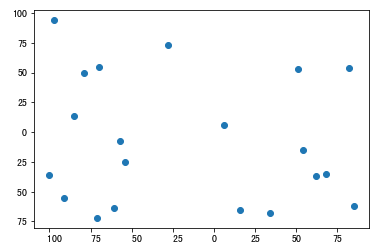

In [6]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [15]:
chosen_p = (5, 10)

In [111]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

NameError: name 'plt' is not defined